In [7]:
import os
import yaml
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from collections import defaultdict

ModuleNotFoundError: No module named 'networkx'

In [17]:
brands_yml = r'..\brands\brands.yml'
brands = yaml.load(open(brands_yml), Loader=yaml.FullLoader)
brands

[{'company': 'MVP', 'brands': [{'brand': 'Axiom'}, {'brand': 'Streamline'}]},
 {'company': 'Lone Star',
  'brands': [{'brand': 'Sacred'}, {'brand': 'Hooligan'}]},
 {'company': 'Gateway',
  'brands': [{'brand': 'Above Ground Level'}, {'brand': 'Black Zombie'}]},
 {'company': 'Innova'},
 {'company': 'Discraft'},
 {'company': 'House of Discs',
  'brands': [{'brand': 'Latitude 64'},
   {'brand': 'Kastaplast'},
   {'brand': 'Discmania'},
   {'brand': 'Westside'},
   {'brand': 'Dynamic Discs'}]},
 {'company': 'Prodigy'},
 {'company': 'Mint', 'manufacturer': 'MVP'},
 {'company': 'Thought Space Athletics', 'manufacturer': 'MVP'},
 {'company': 'Wild Discs', 'manufacturer': 'MVP'},
 {'company': 'Jester', 'manufacturer': 'MVP'},
 {'company': 'DGA', 'manufacturer': 'Discraft'},
 {'company': 'Millenium',
  'manufacturer': 'Innova',
  'brands': [{'brand': 'Hyzerbomb'}]},
 {'company': 'Infinite', 'manufacturer': 'Innova'}]

defaultdict(<class 'list'>, {0: ['MVP', 'Axiom', 'Streamline'], 1: ['Lone Star', 'Sacred', 'Hooligan'], 2: ['Gateway', 'Above Ground Level', 'Black Zombie'], 3: ['Innova'], 4: ['Discraft'], 5: ['House of Discs', 'Latitude 64', 'Kastaplast', 'Discmania', 'Westside', 'Dynamic Discs'], 6: ['Prodigy'], 7: ['Mint'], 8: ['Thought Space Athletics'], 9: ['Wild Discs'], 10: ['Jester'], 11: ['DGA'], 12: ['Millenium', 'Hyzerbomb'], 13: ['Infinite']})


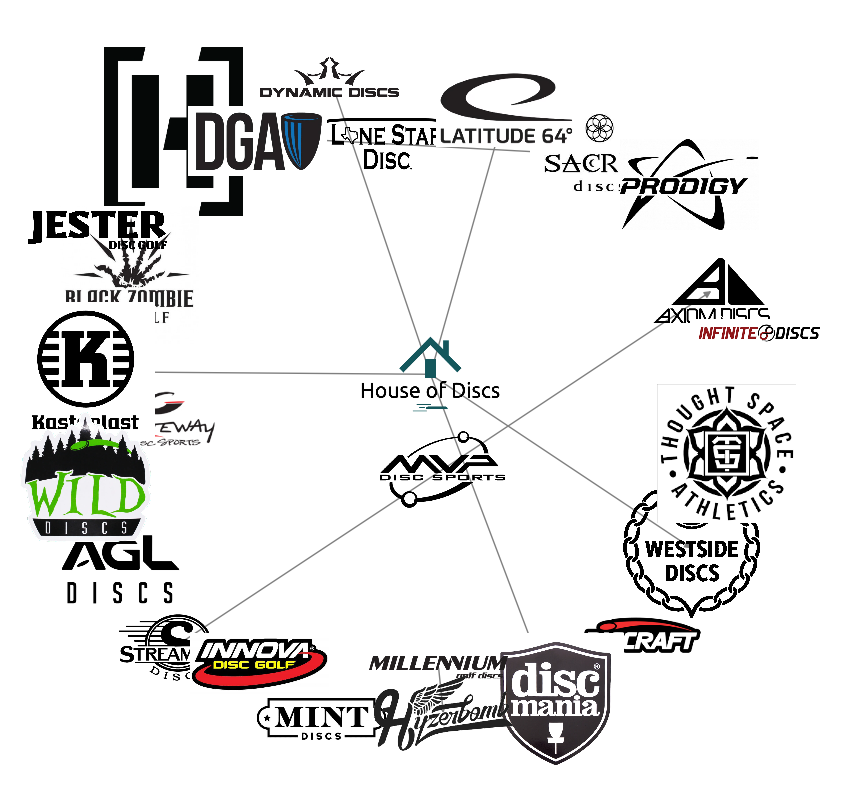

In [56]:
# Create a new graph
G = nx.DiGraph()

# Add nodes and edges to the graph
community_to_node = defaultdict(list)
for community_id, company_data in enumerate(brands):
    company_name = company_data["company"]
    G.add_node(company_name)
    community_to_node[community_id].append(company_name)
    if 'brands' in company_data:
        for brand in company_data["brands"]:
            brand_name = brand["brand"]
            G.add_node(brand_name)
            G.add_edge(company_name, brand_name)
            community_to_node[community_id].append(brand_name)

node_to_community = {node: community_id for community_id, nodes in community_to_node.items() for node in nodes}

print(community_to_node)
# Visualize the graph
pos = nx.spring_layout(G, seed=42) #, pos=node_to_community)  # Layout the graph using the spring layout algorithm

# Draw the nodes and edges
# Place logos at nodes
fig, ax = plt.subplots(figsize=(10, 10))

for node in G.nodes:
    # nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color="blue")
    img = mpimg.imread(os.path.join('..', 'brands', 'logos', node + '.png'))
    # scale image to width of 100 pixels, but preserve aspect ratio
    imagebox = OffsetImage(img, zoom=100/img.shape[1])
    ab = AnnotationBbox(imagebox, pos[node], frameon=False)
    ax.add_artist(ab)
    
nx.draw(G, pos, with_labels=False, node_size=0, edge_color="grey", ax=ax)

# Display the plot
plt.show()




In [8]:
import pygraphviz as pgv

# Create a new graph
G = pgv.AGraph()

# Add nodes to the graph with images
G.add_node('1', image=os.path.join('..', 'brands', 'logos', 'MVP.png'))
G.add_node('2', image=os.path.join('..', 'brands', 'logos', 'Innova.png'))
G.add_node('3', image=os.path.join('..', 'brands', 'logos', 'Discraft.png'))

# Add edges to the graph
G.add_edge('1', '2')
G.add_edge('2', '3')
G.add_edge('3', '1')

# Define layout attributes
G.layout(prog='dot')

# Save the graph to a file
G.draw('graph.png')


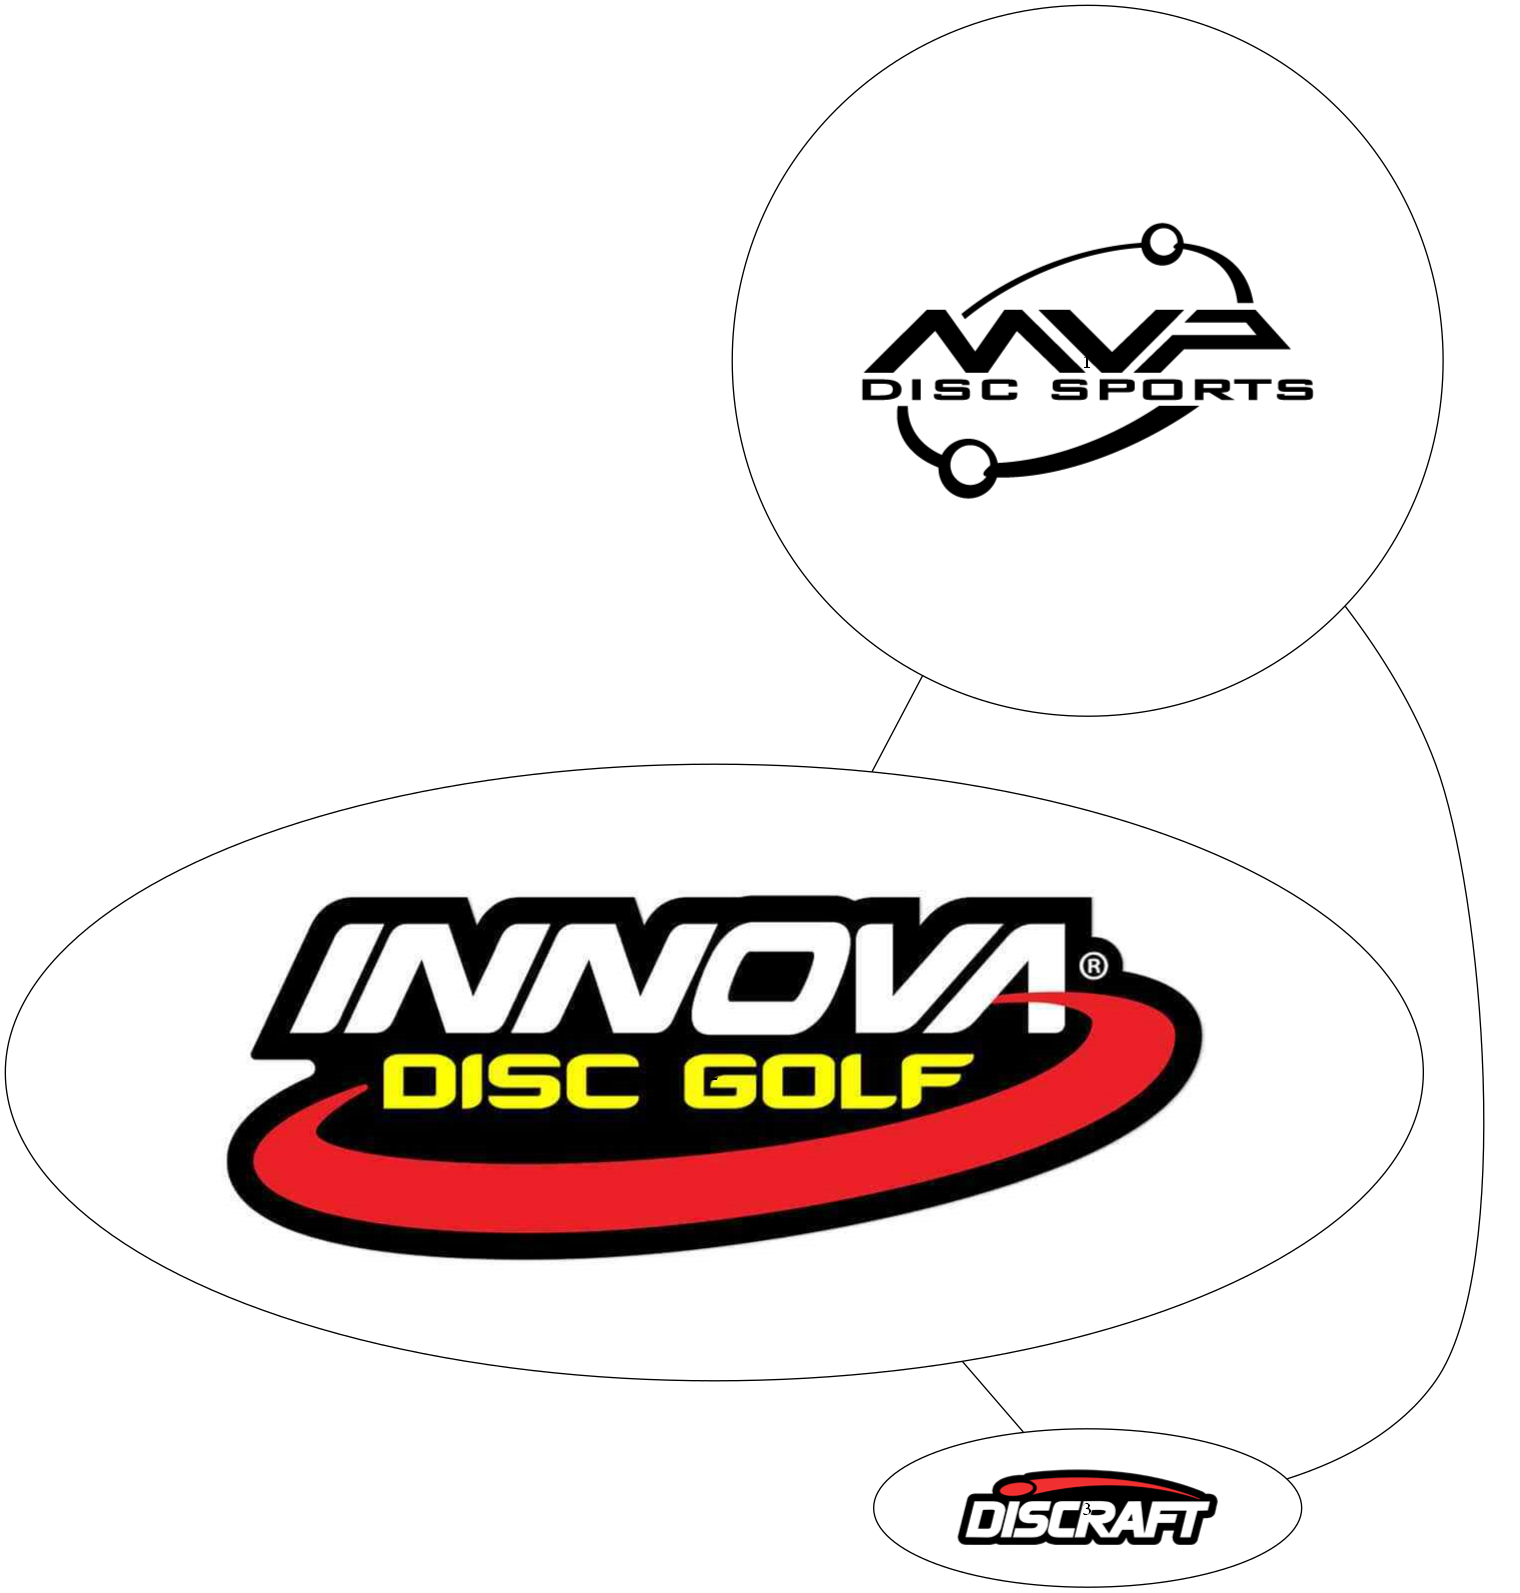

In [9]:
# show graph
from IPython.display import Image
Image('graph.png')

In admin powershell

choco install graphviz

python -m pip install --use-pep517 `
              --config-setting="--global-option=build_ext" `
              --config-setting="--global-option=-IC:\Program Files\Graphviz\include" `
              --config-setting="--global-option=-LC:\Program Files\Graphviz\lib" `
              pygraphviz


In [15]:
from PIL import Image as PilImage


def resize_image(image_path, output_path, max_width, max_height):
    # Open the image
    image = PilImage.open(image_path)

    # Get the original width and height
    width, height = image.size

    # Calculate the aspect ratio
    aspect_ratio = width / height

    # calculate new width and height resizing to fit max in either direction
    new_width = int(max_height * aspect_ratio)
    new_height = int(max_width / aspect_ratio)

    # If resized image violates max_width or max_height, use other dimension to resize
    if new_width > max_width:
        new_width = int(new_height * aspect_ratio)
    elif new_height > max_height:
        new_height = int(new_width / aspect_ratio)

    # Resize the image
    resized_image = image.resize((new_width, new_height))

    # Save the resized image
    resized_image.save(output_path)


def resize_images(image_dir, output_dir, max_width, max_height):
    # Iterate through the files in the directory
    for image_file in [file for file in os.listdir(image_dir) if file.endswith(".png")]:
        # Get the path to the image
        image_path = os.path.join(image_dir, image_file)

        # Get the path to the resized image
        output_path = os.path.join(output_dir, image_file)

        # Resize the image
        resize_image(image_path, output_path, max_width, max_height)

image_dir = os.path.join('..', 'brands', 'logos')
output_dir = os.path.join('..', 'brands', 'logos', 'resized')
max_width = 150
max_height = 100
resize_images(image_dir, output_dir, max_width, max_height)


In [40]:
def get_logo(brand_name, size=(100, 100)):
    # Load and resize the image
    logo_path = os.path.join('..', 'brands', 'logos', brand_name + '.png')
    logo = Image.open(logo_path)
    resized_logo = logo.resize(size)  # Adjust the dimensions as needed

    # Convert the PIL image to a string
    buffer = io.BytesIO()
    resized_logo.save(buffer, format="PNG")
    image_data = buffer.getvalue()
    return resized_logo


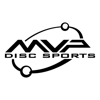

In [41]:
logo_data = get_logo('MVP')
logo_data

In [19]:
def resize_logo(brand_name, max_width, max_height):
    image_path = os.path.join('..', 'brands', 'logos', brand_name + '.png')
    resized_path = os.path.join('..', 'brands', 'logos', 'resized', brand_name + '.png')
    
    # Open the image
    image = PilImage.open(image_path)

    # Get the original width and height
    width, height = image.size

    # Calculate the aspect ratio
    aspect_ratio = width / height

    # calculate new width and height resizing to fit max in either direction
    new_width = int(max_height * aspect_ratio)
    new_height = int(max_width / aspect_ratio)

    # If resized image violates max_width or max_height, use other dimension to resize
    if new_width > max_width:
        new_width = int(new_height * aspect_ratio)
    elif new_height > max_height:
        new_height = int(new_width / aspect_ratio)

    # Resize the image
    resized_image = image.resize((new_width, new_height))

    # Save the resized image
    resized_image.save(resized_path)
    return resized_path

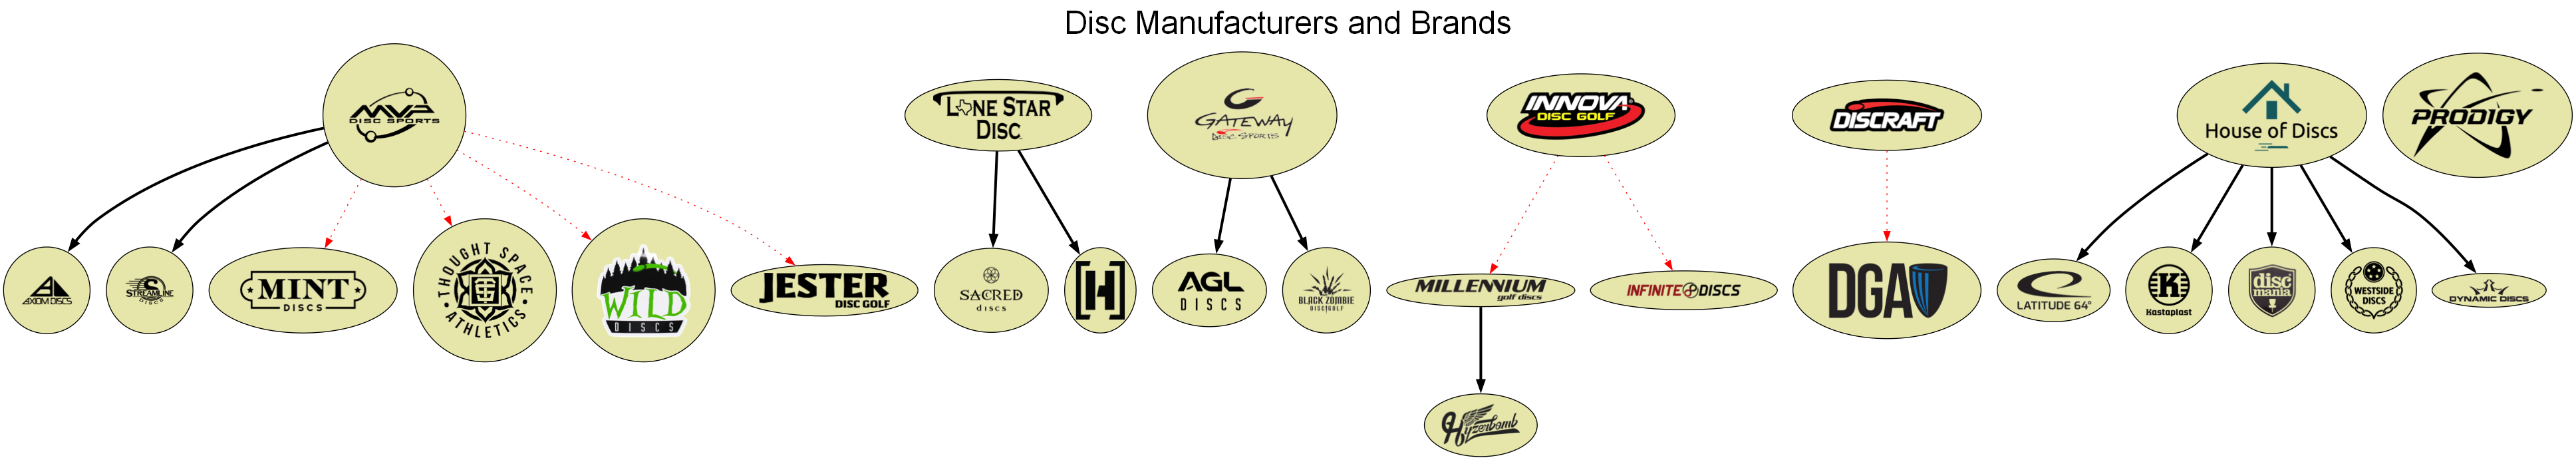

In [38]:
from IPython.display import Image as IPImage
import pygraphviz as pgv
import yaml
import os


brands_yml = r'..\brands\brands.yml'
data = yaml.load(open(brands_yml), Loader=yaml.FullLoader)

# Create a new graph
G = pgv.AGraph(strict=False, directed=True)

# Add nodes for each company and brand
for company in data:
    company_name = company['company']
    
    # resize the company logo
    max_width, max_height = 200, 150
    resized_path = resize_logo(company_name, max_width, max_height)

    G.add_node(company_name, label='', image=resized_path, width=0.5, height=0.5)

    # Add smaller logos for each brand
    if 'brands' in company:
        for brand in company['brands']:
            brand_name = brand['brand']
            # resize the brand logo
            max_width, max_height = 120, 90
            resized_path = resize_logo(brand_name, max_width, max_height)
            G.add_node(brand_name, label='', image=resized_path)

            # Add edges between brands and their company
            G.add_edge(company_name, brand_name, len=0.5, color='black', penwidth=3)

# Add edges connecting companies manufacturing other companies' brands
for company in data:
    company_name = company['company']
    if 'brands' in company:
        for brand in company['brands']:
            if 'manufacturer' in brand:
                G.add_edge(brand['manufacturer'], company_name)
    
    if 'manufacturer' in company:
        G.add_edge(company['manufacturer'], company_name, style='dotted', color='red', penwidth=1)

# Set graph attributes
G.graph_attr['label'] = 'Disc Manufacturers and Brands'
G.graph_attr['labelloc'] = 't'
G.graph_attr['fontname'] = 'Arial'  # Set the font to Arial
G.graph_attr['fontsize'] = 36  # Adjust the font size
G.graph_attr['fontcolor'] = 'black'  # Set the font color
G.graph_attr['fontweight'] = 'bold'  # Set the font weight to bold

G.node_attr['style'] = 'filled'
G.node_attr['fillcolor'] = '#e6e5aa'

# Define layout attributes
G.layout(prog='dot')

# Save the graph to a file
G.draw('graph.png')

IPImage('graph.png')
